In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Gathering

In [2]:
#working with multiple sheets from the same file
xlsx = pd.ExcelFile('/Users/Lei/Developer/KPMG/KPMG_VI_New_raw_data_update_final.xlsx')

In [3]:
# read the first worksheet in the excel file 
df_transactions = pd.read_excel(xlsx, 'Transactions')

In [4]:
# read the second worksheet in the excel file 
df_new_customer_list = pd.read_excel(xlsx, 'NewCustomerList')

In [98]:
# read the third worksheet in the excel file 
df_customer_demographic = pd.read_excel(xlsx, 'CustomerDemographic')

In [7]:
# read the forth worksheet in the excel file 
df_customer_address = pd.read_excel(xlsx, 'CustomerAddress')

## Data Assessment

This section will examine the data quality issues and come up with strategies to mitigate these issues. We will use the 'Data Quality Framework' provided by the KPMG Data Analytics Team to assess the quality of the data provided directly from the customers. 

**Data Quality Framework Table**

Below is a list of the Data Quality dimensions the team may use to evaluate a dataset.

- Correct Values: Accuracy 
- Data Fields with Values: Completeness
- ValuesFree from Contradiction: Consistency
- Data items with Value Meeta-data: Relevancy
- Data Containing Allowable Values: Validity 
- Records that are duplicated: Uniqueness 

### 1. df_transactions

In [8]:
df_transactions.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145


In [9]:
# replacing header with the top row 
new_header_1 = df_transactions.iloc[0]
df_transactions = df_transactions[1:]
df_transactions.columns = new_header_1

In [10]:
df_transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226


In [11]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 1 to 20000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   transaction_id           20000 non-null  object
 1   product_id               20000 non-null  object
 2   customer_id              20000 non-null  object
 3   transaction_date         20000 non-null  object
 4   online_order             19640 non-null  object
 5   order_status             20000 non-null  object
 6   brand                    19803 non-null  object
 7   product_line             19803 non-null  object
 8   product_class            19803 non-null  object
 9   product_size             19803 non-null  object
 10  list_price               20000 non-null  object
 11  standard_cost            19803 non-null  object
 12  product_first_sold_date  19803 non-null  object
dtypes: object(13)
memory usage: 2.0+ MB


In [49]:
sum(df_transactions.duplicated())

0

Notes:

- Incomplete data for columns include: online_order, brand         product_line, product_class, product_size, standard_cost, product_first_sold_date

- Incorrect values in product_first_sold_date

### 2. df_new_customer_list

In [12]:
df_new_customer_list.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,NaN,NaN,NaN,NaN,NaN,Rank,Value
1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1.0,1,1.71875
2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1.0,1,1.71875
3,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1.0,1,1.71875
4,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4.0,4,1.70312


In [13]:
# replacing header with the top row 
new_header_2 = df_new_customer_list.iloc[0]
df_new_customer_list = df_new_customer_list[1:]
df_new_customer_list.columns = new_header_2

In [14]:
df_new_customer_list.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,NaN,NaN,NaN,NaN,NaN,Rank,Value
1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1.0,1,1.71875
2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1.0,1,1.71875
3,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1.0,1,1.71875
4,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4.0,4,1.70312
5,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.5200,0.6500,0.650000,4.0,4,1.70312


In [44]:
df_new_customer_list.columns.notnull()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False,  True,  True])

In [45]:
#drop nan columns, so that we could get the info of this dataframe
df_new_customer_list = df_new_customer_list.loc[:, df_new_customer_list.columns.notnull()]

In [46]:
df_new_customer_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 1 to 1000
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   first_name                           1000 non-null   object
 1   last_name                            971 non-null    object
 2   gender                               1000 non-null   object
 3   past_3_years_bike_related_purchases  1000 non-null   object
 4   DOB                                  983 non-null    object
 5   job_title                            894 non-null    object
 6   job_industry_category                835 non-null    object
 7   wealth_segment                       1000 non-null   object
 8   deceased_indicator                   1000 non-null   object
 9   owns_car                             1000 non-null   object
 10  tenure                               1000 non-null   object
 11  address                              1000 n

In [48]:
sum(df_new_customer_list.duplicated())

0

In [50]:
df_new_customer_list.describe()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
count,1000,971,1000,1000,983,894,835,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000.0000
unique,940,961,3,100,961,184,9,3,1,2,23,1000,522,3,1,16,324,324.0000
top,Mandie,Eade,Female,60,1951-04-30,Associate Professor,Financial Services,Mass Customer,N,No,9,79907 Randy Center,2232,NSW,Australia,9,760,0.6375
freq,3,2,513,20,2,15,203,508,1000,507,79,1,9,506,1000,173,13,13.0000


In [56]:
df_new_customer_list['gender'].value_counts()

Female    513
Male      470
U          17
Name: gender, dtype: int64

Notes: 

- 5 columns with 'Nan' as column name
- incomplete data in columns: last_name, DOB, job_title, job_industry_category
- the 'U' in gender category should be fixed

### 3. df_customer_demographic

In [99]:
df_customer_demographic.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
3,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15
4,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7


In [100]:
# replacing header with the top row 
new_header_3 = df_customer_demographic.iloc[0]
df_customer_demographic = df_customer_demographic[1:]
df_customer_demographic.columns = new_header_3

In [101]:
df_customer_demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
3,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15
4,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7
5,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8


In [102]:
df_customer_demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 1 to 4000
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   customer_id                          4000 non-null   object
 1   first_name                           4000 non-null   object
 2   last_name                            3875 non-null   object
 3   gender                               4000 non-null   object
 4   past_3_years_bike_related_purchases  4000 non-null   object
 5   DOB                                  3913 non-null   object
 6   job_title                            3494 non-null   object
 7   job_industry_category                3344 non-null   object
 8   wealth_segment                       4000 non-null   object
 9   deceased_indicator                   4000 non-null   object
 10  default                              3698 non-null   object
 11  owns_car                             4000 n

In [61]:
sum(df_customer_demographic.duplicated())

0

In [62]:
df_customer_demographic.describe()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
count,4000,4000,3875,4000,4000,3913,3494,3344,4000,4000,3698,4000,3913
unique,4000,3139,3725,6,100,3448,195,9,3,2,90,2,22
top,4000,Tobe,Ramsdell,Female,16,1978-01-30 00:00:00,Business Systems Development Analyst,Manufacturing,Mass Customer,N,100,Yes,7
freq,1,5,3,2037,56,7,45,799,2000,3998,113,2024,235


In [63]:
df_customer_demographic['gender'].value_counts()

Female    2037
Male      1872
U           88
Femal        1
M            1
F            1
Name: gender, dtype: int64

In [70]:
df_customer_demographic['DOB'] = pd.to_datetime(df_customer_demographic['DOB'])

/Users/Lei/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [71]:
df_customer_demographic['DOB'].describe()

count                    3913
unique                   3448
top       1978-01-30 00:00:00
freq                        7
first     1843-12-21 00:00:00
last      2002-03-11 00:00:00
Name: DOB, dtype: object

Notes:

- The DOB contains data recorded as '1843-12-21'. This is an apparent incorrect data, as the customer would be 177 years old. This is not a reasonable range of age. 
- The gender sector has a typo 'Femal'
- The gender 'M' and 'F' should be revised to 'Male' and 'Female'
- in general, the df_customer_demographic is largely overlapped with the info provided in the df_new_customer_list. Should be merged for further investigation. 
- incomplete data in columns include: last_name, DOB, job_title, job_industry_category, default, tenure

### 4. df_customer_address

In [72]:
df_customer_address.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,New South Wales,Australia,10
2,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
3,4,0 Holy Cross Court,4211,QLD,Australia,9
4,5,17979 Del Mar Point,2448,New South Wales,Australia,4


In [73]:
# replacing header with the top row 
new_header_4 = df_customer_address.iloc[0]
df_customer_address = df_customer_address[1:]
df_customer_address.columns = new_header_4

In [74]:
df_customer_address.head()

,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,New South Wales,Australia,10
2,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
3,4,0 Holy Cross Court,4211,QLD,Australia,9
4,5,17979 Del Mar Point,2448,New South Wales,Australia,4
5,6,9 Oakridge Court,3216,VIC,Australia,9


In [79]:
sum(df_customer_address.duplicated())

0

In [75]:
df_customer_address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 1 to 3999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   object
 1   address             3999 non-null   object
 2   postcode            3999 non-null   object
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   object
dtypes: object(6)
memory usage: 187.6+ KB


In [77]:
df_customer_address.describe()

,customer_id,address,postcode,state,country,property_valuation
count,3999,3999,3999,3999,3999,3999
unique,3999,3996,873,5,1,12
top,4003,3 Mariners Cove Terrace,2170,NSW,Australia,9
freq,1,2,31,2054,3999,647


In [78]:
df_customer_address['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

Notes: 

- In the state column, revise ‘New South Wales’ and ‘Victoria’ to ‘NSW’ and ‘VIC’ respectively. 

## Data Cleaning and Analysis 

### 1. Age Distribution of the Existing Customers

In [103]:
df_customer_demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 1 to 4000
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   customer_id                          4000 non-null   object
 1   first_name                           4000 non-null   object
 2   last_name                            3875 non-null   object
 3   gender                               4000 non-null   object
 4   past_3_years_bike_related_purchases  4000 non-null   object
 5   DOB                                  3913 non-null   object
 6   job_title                            3494 non-null   object
 7   job_industry_category                3344 non-null   object
 8   wealth_segment                       4000 non-null   object
 9   deceased_indicator                   4000 non-null   object
 10  default                              3698 non-null   object
 11  owns_car                             4000 n

In [132]:
ages = []
for i in np.arange(df_customer_demographic.shape[0]):
    try:
        ages.append(2020 - df_customer_demographic.iloc[i]['DOB'].year)
    except:
        ages.append(np.nan)
df_customer_demographic['age'] = ages

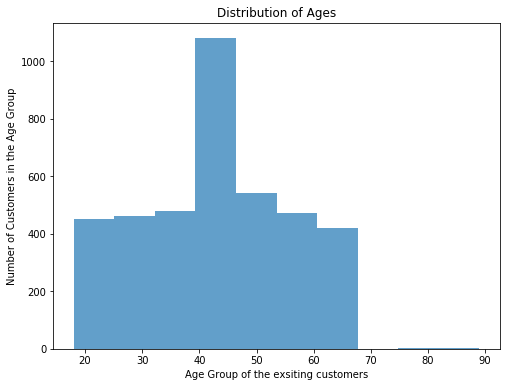

In [140]:
df_customer_demographic['age'].plot(kind = 'hist', bins = 10, figsize=(8,6), alpha = 0.7)

plt.ylabel('Number of Customers in the Age Group')
plt.xlabel('Age Group of the exsiting customers')
plt.title('Distribution of Ages')
plt.show();

### 2.Wealth Distribution of the old and new Customers

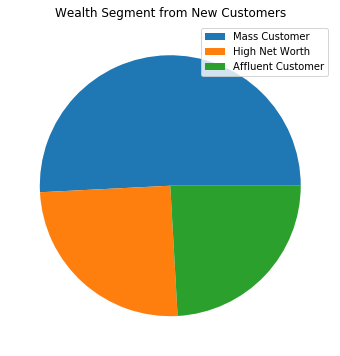

In [199]:
plt.figure(figsize=(8, 6))
plt.pie(df_new_customer_list['wealth_segment'].value_counts())
plt.legend(['Mass Customer', 'High Net Worth', 'Affluent Customer'])
plt.title('Wealth Segment from New Customers');

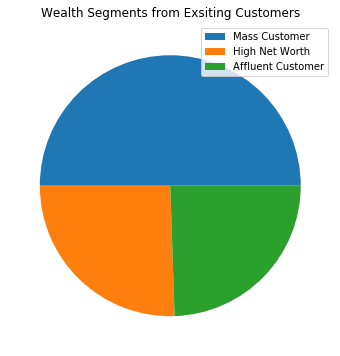

In [200]:
plt.figure(figsize=(8, 6))
plt.pie(df_customer_demographic['wealth_segment'].value_counts())
plt.legend(['Mass Customer', 'High Net Worth', 'Affluent Customer'])
plt.title('Wealth Segments from Exsiting Customers');

### 3. Industry Distribution of the old and new Customers

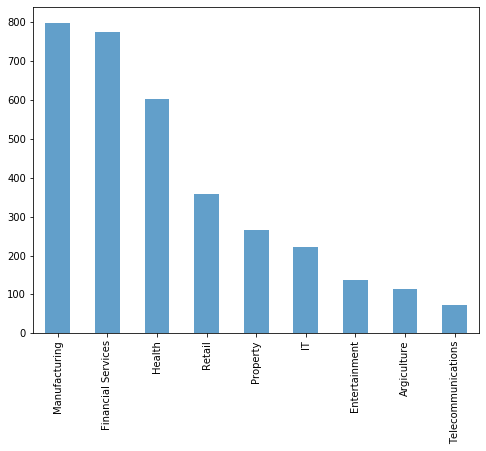

In [195]:
df_customer_demographic['job_industry_category'].value_counts().plot(kind = 'bar', figsize = (8, 6), alpha = 0.7);

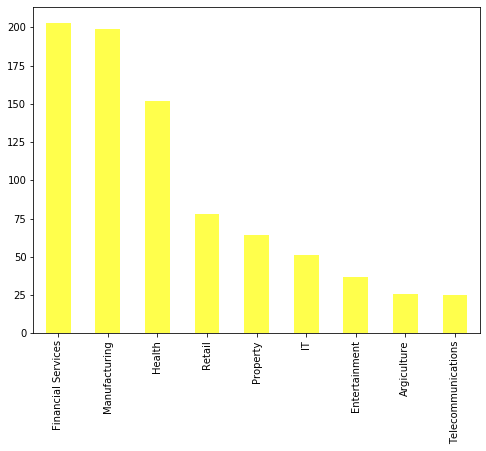

In [196]:
df_new_customer_list['job_industry_category'].value_counts().plot(kind = 'bar', figsize = (8, 6), color = 'yellow', alpha = 0.7);

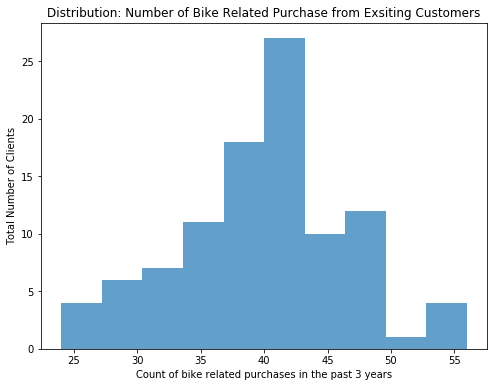

In [218]:
plt.figure(figsize=(8, 6))
plt.hist(df_customer_demographic['past_3_years_bike_related_purchases'].value_counts(), alpha = 0.7)
plt.title('Distribution: Number of Bike Related Purchase from Exsiting Customers')
plt.xlabel('Count of bike related purchases in the past 3 years')
plt.ylabel('Total Number of Clients');

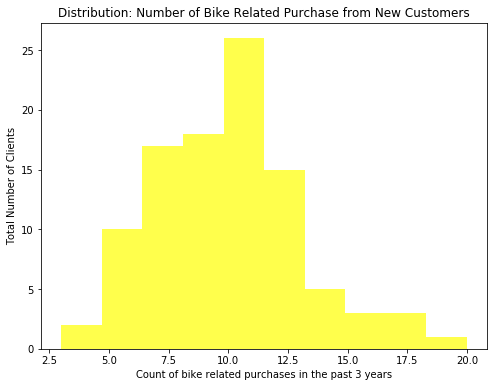

In [219]:
plt.figure(figsize=(8, 6))
plt.hist(df_new_customer_list['past_3_years_bike_related_purchases'].value_counts(), color = 'Yellow', alpha = 0.7)
plt.title('Distribution: Number of Bike Related Purchase from New Customers')
plt.xlabel('Count of bike related purchases in the past 3 years')
plt.ylabel('Total Number of Clients');